<a href="https://colab.research.google.com/github/likhith-kumarn/Data_Science/blob/main/Student_Performance_Prediction_%26_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("/content/Student_Performance.csv")
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
df.shape

(10000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [ ]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
df.isnull().any()

,0
Hours Studied,False
Previous Scores,False
Extracurricular Activities,False
Sleep Hours,False
Sample Question Papers Practiced,False
Performance Index,False


In [ ]:
df.describe()


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes":1, "No":0})


In [ ]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [ ]:
correlation=df.corr(numeric_only=True)
correlation

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


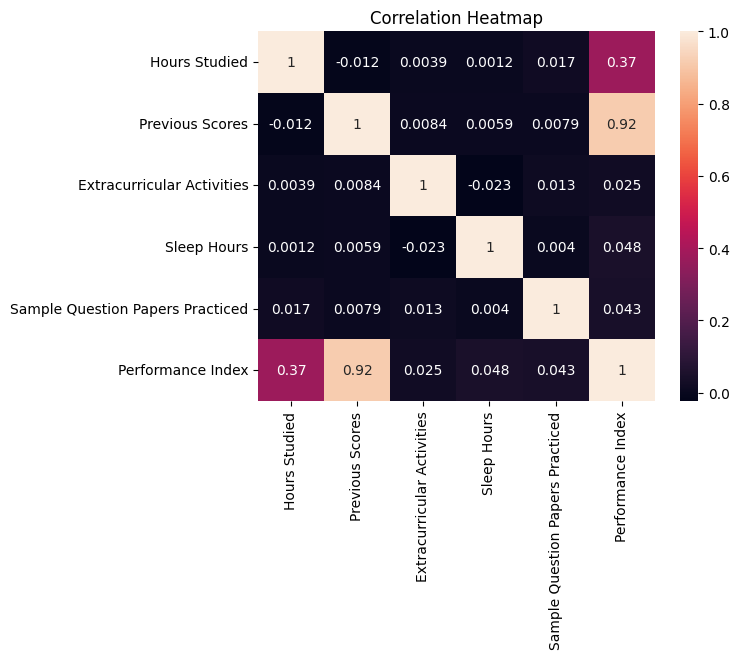

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.title("Correlation Heatmap")
sns.heatmap(correlation,annot=True)
plt.show()

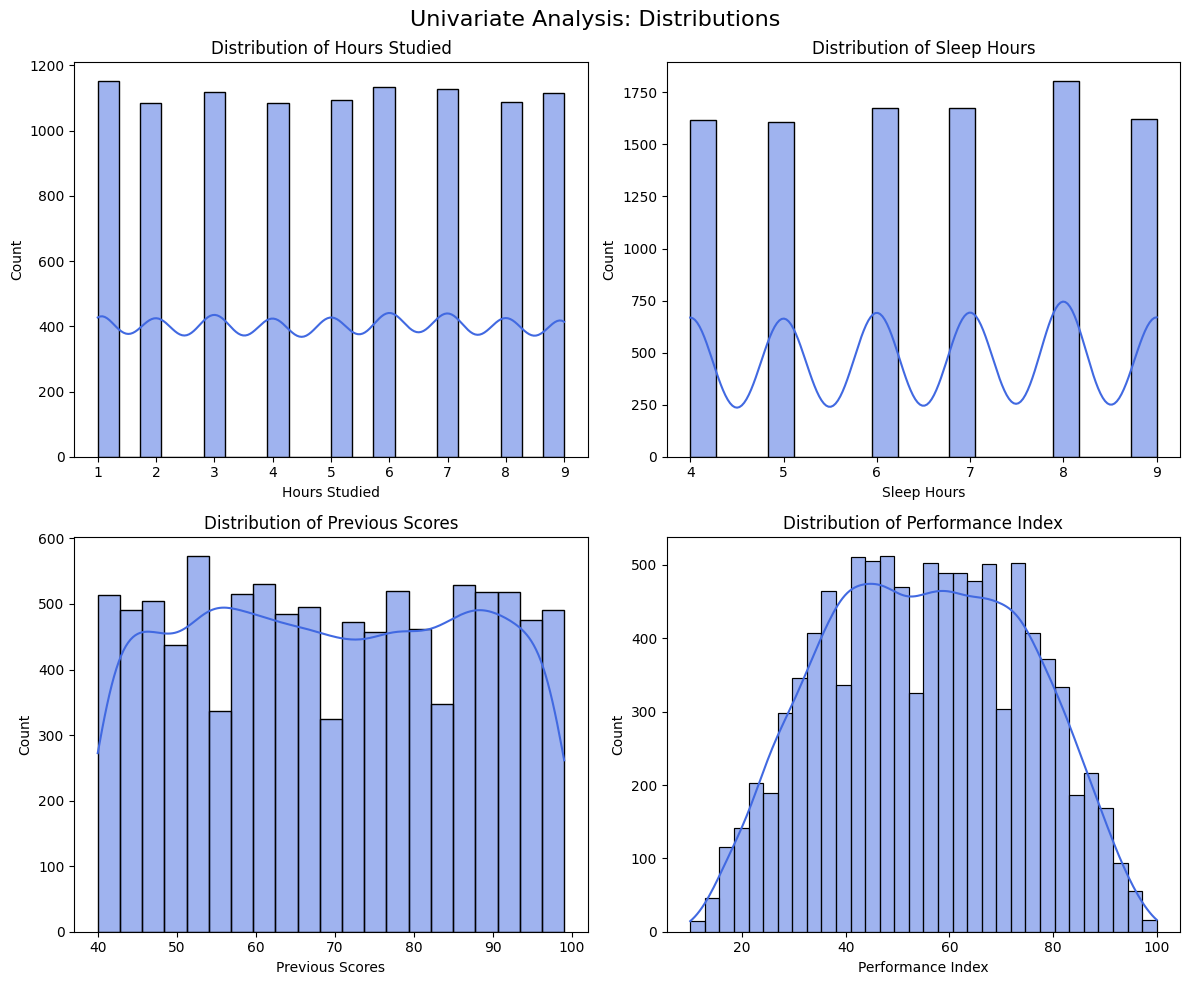

In [ ]:
features = ['Hours Studied', 'Sleep Hours', 'Previous Scores', 'Performance Index']

# Create a figure with 4 subplots (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Univariate Analysis: Distributions', fontsize=16)

# Loop through the columns and create a histogram with a KDE (Kernel Density Estimate) curve
for idx, feature in enumerate(features):
    row = idx // 2
    col = idx % 2
    sns.histplot(df[feature], kde=True, ax=axes[row, col], color='royalblue')
    axes[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

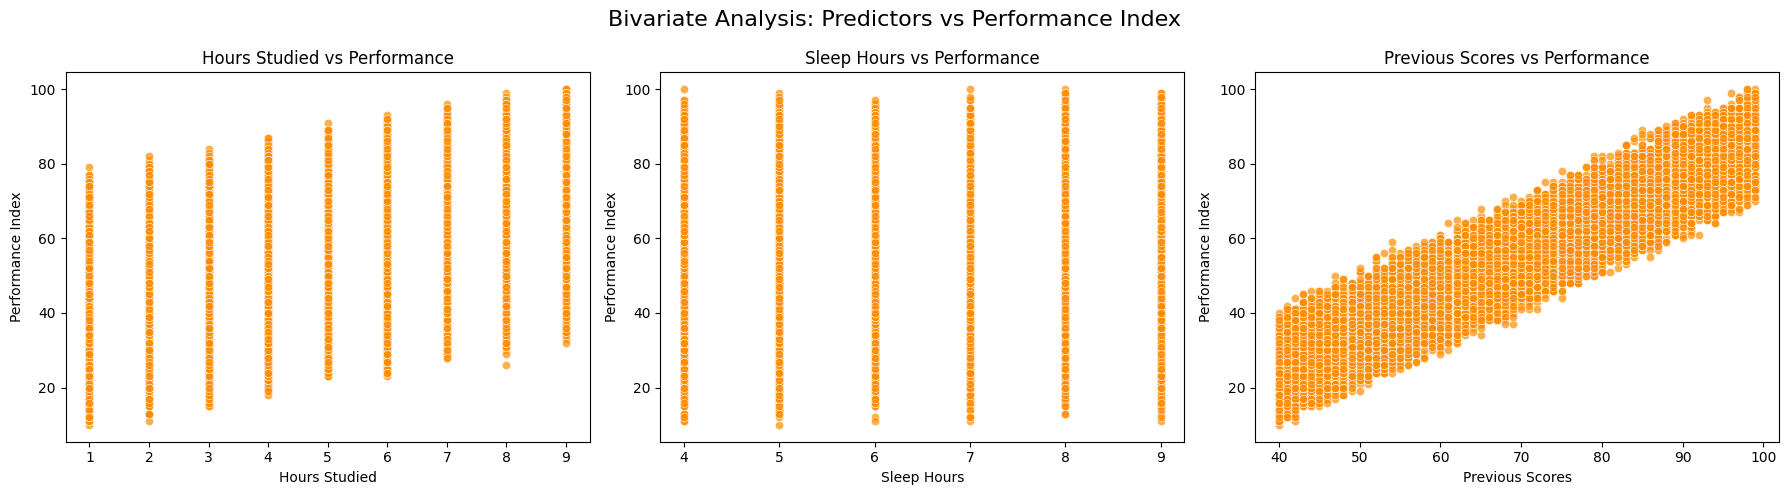

In [ ]:
predictors = ['Hours Studied', 'Sleep Hours', 'Previous Scores']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Bivariate Analysis: Predictors vs Performance Index', fontsize=16)

# Loop through predictors to create scatter plots
for idx, predictor in enumerate(predictors):
    sns.scatterplot(data=df, x=predictor, y='Performance Index', ax=axes[idx], color='darkorange', alpha=0.7)
    axes[idx].set_title(f'{predictor} vs Performance')

plt.tight_layout()
plt.show()

In [ ]:
performance_corr = correlation['Performance Index'].sort_values(ascending=False)
strongest_corr = performance_corr.drop('Performance Index').iloc[0]
strongest_feature = performance_corr.drop('Performance Index').index[0]

print(f"The strongest correlated feature with 'Performance Index' is '{strongest_feature}' with a correlation of {strongest_corr:.2f}.")


The strongest correlated feature with 'Performance Index' is 'Previous Scores' with a correlation of 0.92.


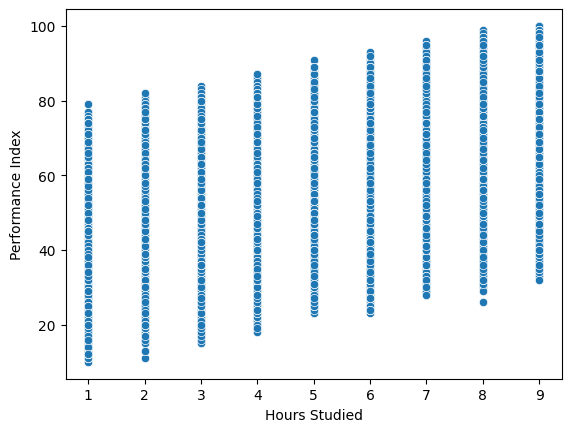

In [ ]:
sns.scatterplot(x="Hours Studied", y="Performance Index", data=df)
plt.show()

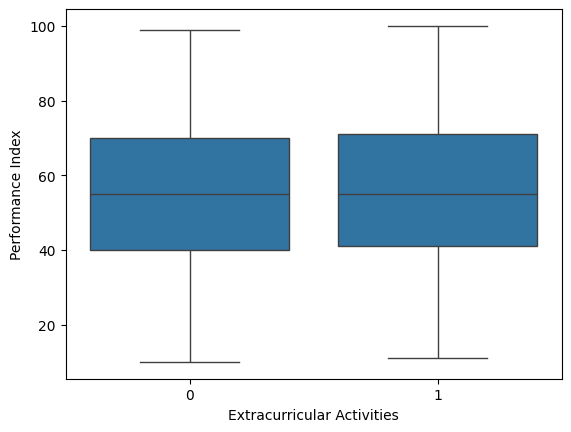

In [ ]:
sns.boxplot(x="Extracurricular Activities", y="Performance Index", data=df)
plt.show()

In [ ]:
x = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=(0.2),random_state=42)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [ ]:
y_model_pred=model.predict(x_test)
y_model_pred

array([1316.86785339,  889.36380863, 1103.52679334, ...,  782.67722395,
       1549.82346362, 1159.23009542])

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

y_pred_ridge = ridge.predict(x_test)
y_pred_ridge

array([1316.70950137,  889.25939126, 1103.39530152, ...,  782.58599425,
       1549.63600861, 1159.09160904])

In [ ]:
from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)

y_pred_lasso=lasso.predict(x_test)
y_pred_lasso

array([1308.48399246,  883.2890263 , 1095.94982751, ...,  777.48268485,
       1540.04849178, 1151.54907605])

In [ ]:
from sklearn.ensemble  import RandomForestRegressor

dt=RandomForestRegressor(random_state=42)
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
y_pred_dt

array([97.23, 98.62, 98.62, ..., 98.62, 97.23, 97.23])

In [ ]:
rf=RandomForestRegressor(random_state=42)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
y_pred_rf

array([97.23, 98.62, 98.62, ..., 98.62, 97.23, 97.23])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse=mean_squared_error(y_test,y_model_pred)
mae=mean_absolute_error(y_test,y_model_pred)
r2=r2_score(y_test,y_model_pred)
mse

1681521.7986875544

In [ ]:
mse

1681521.7986875544

In [ ]:
r2

-4536.477966836515

In [57]:
df['study_efficiency']=df['Performance Index']/df['Hours Studied']
df['study_efficiency']

,study_efficiency
0,13.000000
1,16.250000
2,5.625000
3,7.200000
4,9.428571
...,...
9995,23.000000
9996,8.285714
9997,12.333333
9998,10.555556


In [58]:
df['Score Improvement']=df['Performance Index']-df['Previous Scores']
df['Score Improvement']

,Score Improvement
0,-8.0
1,-17.0
2,-6.0
3,-16.0
4,-9.0
...,...
9995,-26.0
9996,-6.0
9997,-9.0
9998,-2.0


In [60]:
df['study_to_sleep']=df['Hours Studied']/df['Sleep Hours']
df['study_to_sleep']

,study_to_sleep
0,0.777778
1,1.000000
2,1.142857
3,1.000000
4,0.875000
...,...
9995,0.250000
9996,0.875000
9997,0.750000
9998,1.285714


**Define Goal**

1️⃣ Business Problem Statement

Educational institutions want to understand:

What factors affect student performance?
How many hours should a student ideally study?
Does sleep impact performance?
Do extracurricular activities reduce academic scores?
Can we predict performance before exams?

Objective:

Build a predictive model to estimate a student's Performance Index and extract actionable insights.

**Result**

Hours Studied has highest correlation.
Previous Scores strongly influence performance.
Sleep has moderate impact.
Random Forest gives best R² score.
Extracurricular activities have slight but meaningful impact.
